In [1]:
import pandas as pd

In [2]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
claims = pd.read_csv(r'C:\Users\rosee\Desktop\floods analysis\openFEMA_claims20190831[1].csv')
claims.to_csv('claims.csv', encoding='utf-8')
claims.tail(10)

agriculturestructureindicator    asofdate  basefloodelevation  \
2432878                           NaN  2019-08-31               238.0   
2432879                           NaN  2019-08-31                10.0   
2432880                           NaN  2019-08-31                 NaN   
2432881                           NaN  2019-08-31                 8.0   
2432882                           NaN  2019-08-31                 8.0   
2432883                           NaN  2019-08-31                 9.0   
2432884                           NaN  2019-08-31                 9.0   
2432885                           NaN  2019-08-31                10.0   
2432886                           NaN  2019-08-31                 NaN   
2432887                           NaN  2019-08-31                 9.0   

         basementenclosurecrawlspacetype  reportedcity condominiumindicator  \
2432878                              0.0  LIBERTY HILL                    N   
2432879                              0.0         MIAMI                    N   
2432880                              0.0   COOPER CITY                    N   
2432881                              0.0         MIAMI                    N   
2432882                              0.0         MIAMI                    N   
2432883                              0.0         MIAMI                    N   
2432884                              0.0         MIAMI                    N   
2432885                              0.0     PINECREST                    N   
2432886                              0.0     PINECREST                    N   
2432887                              0.0         MIAMI                    N   

         policycount  countycode  crsdiscount  dateofloss  ...  \
2432878          1.0     45055.0         0.05  2015-12-31  ...   
2432879          1.0     12086.0         0.25  2005-08-25  ...   
2432880          1.0     12011.0         0.10  2003-06-23  ...   
2432881          1.0     12086.0         0.25  2005-08-26  ...   
2432882          1.0     12086.0         0.25  2005-08-26  ...   
2432883          1.0     12086.0         0.25  2005-08-26  ...   
2432884          1.0     12086.0         0.25  2005-08-25  ...   
2432885          1.0     12086.0         0.25  2005-06-20  ...   
2432886          1.0     12086.0         0.25  2005-08-25  ...   
2432887          1.0     12086.0         0.25  2005-08-25  ...   

        amountpaidonincreasedcostofcomplianceclaim  \
2432878                                        NaN   
2432879                                        0.0   
2432880                                        0.0   
2432881                                        0.0   
2432882                                        0.0   
2432883                                        0.0   
2432884                                        0.0   
2432885                                        0.0   
2432886                                        0.0   
2432887                                        0.0   

        postfirmconstructionindicator  ratemethod  \
2432878                             Y           1   
2432879                             Y           1   
2432880                             Y           1   
2432881                             Y           1   
2432882                             Y           1   
2432883                             Y           1   
2432884                             Y           1   
2432885                             N           1   
2432886                             N           1   
2432887                             N           1   

         smallbusinessindicatorbuilding state totalbuildinginsurancecoverage  \
2432878                             NaN    SC                       250000.0   
2432879                             NaN    FL                       156000.0   
2432880                             NaN    FL                        27200.0   
2432881                             NaN    FL                       160700.0   
2432882                     

In [4]:
claims.shape

(2432888, 39)

In [5]:
claims.dtypes
#will need to convert date of loss to datetime
#I can drop asofdate because it doesn't matter and is constant

agriculturestructureindicator                  object
asofdate                                       object
basefloodelevation                            float64
basementenclosurecrawlspacetype               float64
reportedcity                                   object
condominiumindicator                           object
policycount                                   float64
countycode                                    float64
crsdiscount                                   float64
dateofloss                                     object
elevatedbuildingindicator                      object
elevationcertificateindicator                  object
elevationdifference                           float64
censustract                                   float64
floodzone                                      object
houseworship                                   object
latitude                                      float64
locationofcontents                             object
longitude                   

In [6]:
claims['yearofloss'].value_counts().sort_values(ascending=False)

#the top ten are not very random, they are more recent years

2005    277024
2012    175789
2017    145466
2008     96972
2011     96461
1979     87375
2016     85463
1998     83621
1995     79582
2004     76033
1983     70474
1999     68191
1996     68137
1992     61551
2001     54492
1980     53227
1985     52339
1989     48696
2003     47846
1993     45979
1982     43118
2018     42429
1984     39236
1997     38162
2010     37818
2009     37733
1991     36599
1978     35897
2015     34577
2002     34512
1981     31178
2006     29651
1994     28634
2007     28360
2013     24060
2000     23255
2019     19299
1990     19266
1987     18992
1986     18863
2014     18774
1988     11949
1977      5667
1976        72
1975        45
1974        13
1973         9
1972         1
1970         1
Name: yearofloss, dtype: int64

In [7]:
claims['state'].value_counts()
#my state made it into 3rd place

LA    458785
TX    371422
FL    295451
NJ    192679
NY    169501
NC    101247
PA     73523
MS     62715
IL     51837
CA     50294
MO     50062
VA     49270
SC     45728
AL     40599
MA     34406
CT     28120
WV     27313
OH     27250
PR     25603
KY     24475
MD     23870
GA     21398
IN     18705
TN     15425
IA     14341
WA     14029
ND     13209
MI     12970
OK     12684
MN     12139
AR      9523
WI      8463
KS      7693
RI      6581
NE      6161
DE      6055
OR      5827
HI      5391
CO      5275
AZ      4946
ME      4673
NH      3985
SD      3649
VI      3537
VT      2816
MT      2103
NV      1851
NM      1372
ID      1074
UT      1060
AK       666
WY       544
DC       412
GU       159
AS        10
Name: state, dtype: int64

In [8]:
claims.describe().T

#I can't use all 2.4 million data, so I will compare these to the sample
#to ensure that my sample really is random

count          mean  \
basefloodelevation                           483589.0  7.137891e+01   
basementenclosurecrawlspacetype             2432843.0  4.672303e-01   
policycount                                 2432880.0  1.247610e+00   
countycode                                  2425385.0  3.020189e+04   
crsdiscount                                 2432880.0  3.494819e-02   
elevationdifference                         2432880.0  7.505239e+02   
censustract                                 2373588.0  3.004539e+10   
latitude                                    2379340.0  3.404449e+01   
longitude                                   2379340.0 -8.614260e+01   
lowestadjacentgrade                          350723.0  7.545709e+01   
lowestfloorelevation                         475071.0  1.482986e+02   
numberoffloorsintheinsuredbuilding          2416237.0  1.722882e+00   
occupancytype                               2432168.0  1.404049e+00   
amountpaidonbuildingclaim                   2359510.0  2.367499e+04   
amountpaidoncontentsclaim                   1712987.0  7.729023e+03   
amountpaidonincreasedcostofcomplianceclaim  1160371.0  7.600233e+02   
totalbuildinginsurancecoverage              2432880.0  1.512794e+05   
totalcontentsinsurancecoverage              2432880.0  2.819080e+04   
yearofloss                                  2432888.0  2.000633e+03   

                                                     std       min  \
basefloodelevation                          3.005833e+02  -6002.00   
basementenclosurecrawlspacetype             9.312251e-01      0.00   
policycount                                 6.239860e+00      1.00   
countycode                                  1.456152e+04   1001.00   
crsdiscount                                 6.239606e-02      0.00   
elevationdifference                         4.321235e+02  -1987.00   
censustract                                 1.445356e+10   1003.00   
latitude                                    5.801293e+00    -14.30   
longitude                                   1.111013e+01   -170.70   
lowestadjacentgrade                         5.465743e+02  -3411.00   
lowestfloorelevation                        9.801414e+02  -6002.00   
numberoffloorsintheinsuredbuilding          8.858817e-01      1.00   
occupancytype                               9.672842e-01      1.00   
amountpaidonbuildingclaim                   5.278161e+04 -29207.05   
amountpaidoncontentsclaim                   2.280169e+04  -8484.00   
amountpaidonincreasedcostofcomplianceclaim  4.441656e+03      0.00   
totalbuildinginsurancecoverage              2.777121e+06      0.00   
totalcontentsinsurancecoverage              4.809394e+04      0.00   
yearofloss                                  1.179710e+01   1970.00   

                                                     25%           50%  \
basefloodelevation                          7.000000e+00  9.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  2.201900e+04  2.916300e+04   
crsdiscount                                 0.000000e+00  0.000000e+00   
elevationdifference                         9.990000e+02  9.990000e+02   
censustract                                 2.201900e+10  2.912796e+10   
latitude                                    2.990000e+01  3.190000e+01   
longitude                                  -9.140000e+01 -8.750000e+01   
lowestadjacentgrade                         3.200000e+00  6.700000e+00   
lowestfloorelevation                        6.500000e+00  1.030000e+01   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   1.085800e+02  4.818810e+03   
amountpaidoncontentsclaim                   0.000000e+00  2.290000e+02   
amountpaidonincreasedcostofcomplianceclaim

In [11]:
#I am not sure how much my computer can handle, so I am 
#gonna start on the larger side and take out 250,000 for the sample

#that was way too much, could not make bar charts. Taking it down to 100k

#still too much, 50k

#after getting some horrible results with a time based split
#I decided to focus on one state only, and I happen to live in 
#Florida, which has the third most claims out of them all

#that is towards the bottom of this notebook, because I needed
#to show the progression of my work

In [5]:
#sclaims = claims[(claims['state'] == 'FL')].sample(n=50000, random_state=2)
#this split can be found towards the end of my notebook

sclaims = claims.sample(n=50000, random_state=42)

In [6]:
print(sclaims.shape)
sclaims.head(10)

(50000, 39)


agriculturestructureindicator    asofdate  basefloodelevation  \
1630994                           NaN  2019-08-31                 6.0   
814339                            NaN  2019-08-31                 NaN   
760971                            NaN  2019-08-31                 NaN   
1004792                           NaN  2019-08-31                 NaN   
1627050                           NaN  2019-08-31                 NaN   
178799                            NaN  2019-08-31                12.0   
1021813                           NaN  2019-08-31                 NaN   
1999509                           NaN  2019-08-31                 NaN   
654084                            NaN  2019-08-31                 NaN   
283496                            NaN  2019-08-31                 NaN   

         basementenclosurecrawlspacetype   reportedcity condominiumindicator  \
1630994                              4.0   FORKED RIVER                    N   
814339                               1.0         DOLTON                    N   
760971                               0.0       OLD LYME                    N   
1004792                              1.0        WATSEKA                    N   
1627050                              2.0       PATERSON                    N   
178799                               0.0  EDISTO ISLAND                    N   
1021813                              0.0        DANBURY                    N   
1999509                              0.0    NEW ORLEANS                    N   
654084                               0.0   PORT CLINTON                    N   
283496                               0.0      PENSACOLA                    N   

         policycount  countycode  crsdiscount  dateofloss  ...  \
1630994          1.0     34029.0         0.00  2012-10-29  ...   
814339           1.0     17031.0         0.00  2008-09-13  ...   
760971           1.0      9011.0         0.00  2012-10-29  ...   
1004792          1.0     17075.0         0.00  2008-01-06  ...   
1627050          1.0     34031.0         0.00  2005-10-14  ...   
178799           1.0     45029.0         0.15  2016-10-08  ...   
1021813          1.0      9001.0         0.00  2011-03-07  ...   
1999509          1.0     22071.0         0.00  1980-04-13  ...   
654084           1.0     39123.0         0.05  1998-03-20  ...   
283496           1.0     12033.0         0.10  2014-04-29  ...   

        amountpaidonincreasedcostofcomplianceclaim  \
1630994                                        0.0   
814339                                         0.0   
760971                                         0.0   
1004792                                    29210.0   
1627050                                        NaN   
178799                                         0.0   
1021813                                        0.0   
1999509                                        NaN   
654084                                         0.0   
283496                                         0.0   

        postfirmconstructionindicator  ratemethod  \
1630994                             Y           2   
814339                              N           1   
760971                              N           1   
1004792                             Y           1   
1627050                             N           1   
178799                              Y           1   
1021813                             N           1   
1999509                             N           1   
654084                              N           1   
283496                              Y           1   

         smallbusinessindicatorbuilding state totalbuildinginsurancecoverage  \
1630994                             NaN    NJ                       250000.0   
814339                              NaN    IL                        75000.0   
760971                              NaN    CT                       227000.0   
1004792                             NaN    IL                        89300.0   
1627050          

In [11]:
sclaims.describe().T

#comparing the mean of the sample vs original, the fluctuations seem reasonable,
#this seems like a fine sample

count          mean  \
basefloodelevation                          17193.0  1.302803e+01   
basementenclosurecrawlspacetype             50000.0  1.092200e-01   
policycount                                 50000.0  2.157120e+00   
countycode                                  49907.0  1.207079e+04   
crsdiscount                                 50000.0  7.477400e-02   
elevationdifference                         50000.0  5.536475e+02   
censustract                                 49405.0  1.206371e+10   
latitude                                    49427.0  2.744190e+01   
longitude                                   49427.0 -8.208980e+01   
lowestadjacentgrade                         11415.0  1.718208e+01   
lowestfloorelevation                        16885.0  6.045879e+01   
numberoffloorsintheinsuredbuilding          49853.0  1.529858e+00   
occupancytype                               49989.0  1.444798e+00   
amountpaidonbuildingclaim                   48424.0  1.507514e+04   
amountpaidoncontentsclaim                   38569.0  4.425322e+03   
amountpaidonincreasedcostofcomplianceclaim  20347.0  2.602260e+02   
totalbuildinginsurancecoverage              50000.0  2.963028e+05   
totalcontentsinsurancecoverage              50000.0  3.674782e+04   
yearofloss                                  50000.0  2.001222e+03   

                                                     std      min  \
basefloodelevation                          4.419452e+01    -14.0   
basementenclosurecrawlspacetype             4.780121e-01      0.0   
policycount                                 1.467449e+01      1.0   
countycode                                  3.641550e+01  12001.0   
crsdiscount                                 8.152473e-02      0.0   
elevationdifference                         4.956682e+02   -953.0   
censustract                                 2.995860e+08  12015.0   
latitude                                    1.870144e+00     24.5   
longitude                                   2.187302e+00    -87.5   
lowestadjacentgrade                         2.715189e+02     -7.4   
lowestfloorelevation                        6.817433e+02     -7.0   
numberoffloorsintheinsuredbuilding          8.895383e-01      1.0   
occupancytype                               9.862717e-01      1.0   
amountpaidonbuildingclaim                   4.910697e+04      0.0   
amountpaidoncontentsclaim                   1.516838e+04      0.0   
amountpaidonincreasedcostofcomplianceclaim  2.546537e+03      0.0   
totalbuildinginsurancecoverage              2.291882e+06      0.0   
totalcontentsinsurancecoverage              5.119392e+04      0.0   
yearofloss                                  1.013389e+01   1975.0   

                                                     25%           50%  \
basefloodelevation                          7.000000e+00  8.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  1.203300e+04  1.208600e+04   
crsdiscount                                 0.000000e+00  5.000000e-02   
elevationdifference                         2.000000e+00  9.990000e+02   
censustract                                 1.203300e+10  1.208601e+10   
latitude                                    2.590000e+01  2.710000e+01   
longitude                                  -8.270000e+01 -8.150000e+01   
lowestadjacentgrade                         4.700000e+00  7.000000e+00   
lowestfloorelevation                        7.800000e+00  9.400000e+00   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   0.000000e+00  1.663030e+03   
amountpaidoncontentsclaim                   0.000000e+00  0.000000e+00   
amountpaidonincreasedcostofcomplianceclaim  0.000000e+00  0.000000e+00   
totalbuildinginsurancecove

In [15]:
# I am choosing betweeen the following features as targets
#I cannot prove the existence of global warming here,
#but what I am trying to prove is that this dataset holds evidence of global warming,
#as flooding (and therefore FEMA claims) have been increasing in recent years

#reading FEMA website for domain knowledge

#confident
#amountpaidonbuildingclaim
#amount of $ paid for building damage after flood
#this may be the most direct way to measure worsening flooding, since there is no
#higher water mark feature

#no
#amountpaidoncontentsclaim
#amount $ paid for damage to belongings after flood
#this probably isn't a great metric since the value of belongings 
#has probably shifted a lot since the 70s

#no
#amountpaidonincreasedcostofcomplainceclaim
#this is extra $ given (up to 30k) to make improvements to the building
#in order to continue receiving flood insurance
#because the building has been severely damaged or 25% of value has been damaged 
#by flood more than twice in a decade
#I wonder if this has increased in recent years due to there being increased flood zones
#this may cause leakage if it isn't target
#won't work because it seems they have a cap

#no
#totalbuildinginsurancecoverage
#the dollar amount of insurance on the building
#this probably has increased for someone who is living near
#a rising flood zone
#conservative people may take out less than they should

#no
#totalcontentsinsurancecoverage
#dollar amount of insurance on belongings
#again this probably isn't the best measure
#conservative people may take out less than they should

#confident
#basefloodelevation
#elevation at which there is a %1 chance of flooding/year
#this may be a good way to show floodplains expanding
#but there is a ten year period that is mysteriously absent

In [ ]:
#some initial graphs to explore the possible targets
#before running the profile report

Text(0.5, 1.0, 'Base Flood Elevation Over Time')

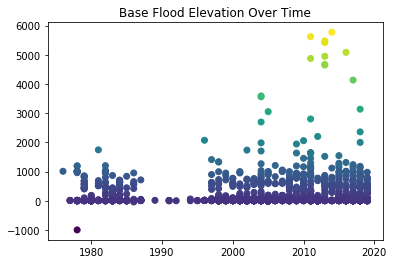

In [117]:
plt.scatter(sclaims['yearofloss'], sclaims['basefloodelevation'], c = sclaims['basefloodelevation'],cmap= 'viridis')
plt.title('Base Flood Elevation Over Time')

#there is quite a big gap in the data here

<BarContainer object of 50000 artists>

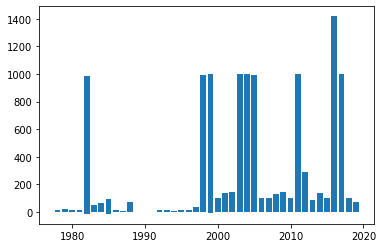

In [19]:
plt.bar(sclaims['yearofloss'], sclaims['basefloodelevation'])

Text(0.5, 1.0, 'Amount Paid for a Building Claim Over Time')

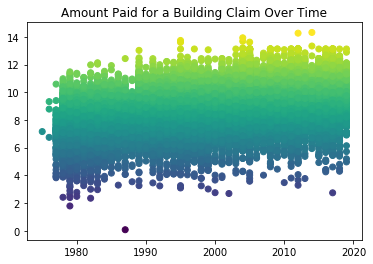

In [119]:
plt.scatter(sclaims['yearofloss'], sclaims['amountpaidonbuildingclaim'],c=sclaims['amountpaidonbuildingclaim'], cmap= 'viridis')
plt.title('Amount Paid for a Building Claim Over Time')

#this seems to have a general upward shift

<BarContainer object of 50000 artists>

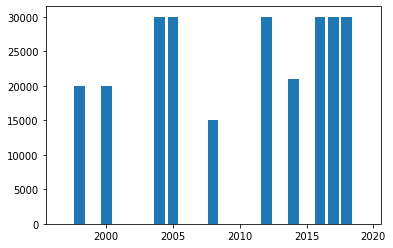

In [19]:
plt.bar(sclaims['yearofloss'], sclaims['amountpaidonincreasedcostofcomplianceclaim'])
#it looks like the amount of money given out for this is capped, 
#which means it will give a limited reflection of the damage

Text(0.5, 1.0, 'Building Insurance Over Time')

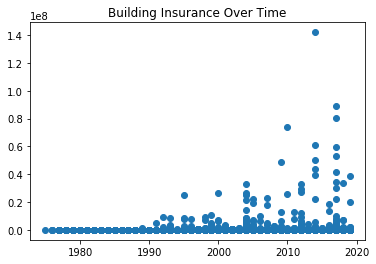

In [13]:
plt.scatter(sclaims['yearofloss'], sclaims['totalbuildinginsurancecoverage'])
plt.title('Building Insurance Over Time')

#there does seem to be a pretty steady rise, lets see
#if that holds up after the split

In [21]:
sclaims['yearofloss'].max()
#just wanted to make sure we aren't going into the future

2019

In [22]:
sclaims.head(1).T

#just want to get a visual of a single row

784326
agriculturestructureindicator                       NaN
asofdate                                     2019-08-31
basefloodelevation                                  NaN
basementenclosurecrawlspacetype                       0
reportedcity                                PALM HARBOR
condominiumindicator                                  N
policycount                                           1
countycode                                        12103
crsdiscount                                           0
dateofloss                                   1993-03-13
elevatedbuildingindicator                             Y
elevationcertificateindicator                       NaN
elevationdifference                                   1
censustract                                  1.2103e+10
floodzone                                            VE
houseworship                                        NaN
latitude                                           28.1
locationofcontents                                  NaN
longitude                                         -82.8
lowestadjacentgrade                                 NaN
lowestfloorelevation                                NaN
numberoffloorsintheinsuredbuilding                    1
nonprofitindicator                                  NaN
obstructiontype                                      10
occupancytype                                         1
originalconstructiondate                     1980-01-01
originalnbdate                               1989-06-03
amountpaidonbuildingclaim                             0
amountpaidoncontentsclaim                           NaN
amountpaidonincreasedcostofcomplianceclaim          NaN
postfirmconstructionindicator                         Y
ratemethod                                            1
smallbusinessindicatorbuilding                      NaN
state                                                FL
totalbuildinginsurancecoverage                   122200
totalcontentsinsurancecoverage                        0
yearofloss                                         1993
reportedzipcode                                   34683
primaryresidence                                    NaN

In [23]:
(sclaims['amountpaidonbuildingclaim'] == 0).value_counts()
#a good portion of my claims haven't actually been given
# $ towards repairing the building after a flood
#37% 
#I wonder why... did they file a claim for their belongings instead?
#maybe they filed a claim and it was rejected

False    31280
True     18720
Name: amountpaidonbuildingclaim, dtype: int64

In [148]:
18720/50000

0.3744

In [149]:
(sclaims['amountpaidoncontentsclaim'] == 0).value_counts()
#also many people didn't file for contents
#33.7%

False    20395
True      9309
Name: amountpaidoncontentsclaim, dtype: int64

In [26]:
84276/250000

0.337104

In [6]:
#lets take a look
!pip install pandas-profiling==2.*

import pandas_profiling

profile_report = sclaims.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

profile_report

In [ ]:
#for these I am referencing the instructions and metadata excel file that gives
#a description of each feature, and/or looking at the FEMA website

#agriculturalstructureindicator has so many 0s because 0 means not ag building
#probably drop
#amountpaidonbuildings claim is messed up, I need to figure that out
#amountpaidoncontentsclaim same story
#amountpaidonincreasedcostofcomplianceclaim these 0s are probably just people who didn't use this
#asofdate drop this
#basefloodelevation these 0s that aren't in the ten year gap are fine
#basementenclosurecrawlspacetype 0 means no crawlspace
#censustract not sure why these are missing, probably newer stuff that wasn't on the last census
#condominiumindicator there shouldn't be 0s here
#crsdiscount 0s mean no discount
#dateofloss needs datetime
#elevatedbuildingindicator shoud not have 0s
#elevationcertificateindicatorjust says whether or not elevation has been certified, unnecessary
#elevationdifference these 0s are fine
#floodzone def should keep all these categoricals
#houseofworship is useless and should be dropped
#latitude and longitude should not have 0s, these should be filled in 
#locationofcontents is not gonna help the model, but the 0s are fine. prob should drop
#lowestadjacentgade the 0s probably mean this data wasn't collected, should drop
#lowestfloorelevation should be skewed, shouldn't have missing values.
#nonprofitindicator should be dropped
#obstructiontype is useless for my model, should drop
##original construction date is probably not useful for model
#originalnbdate needs datetime
#policycount the skew makes sense as most people insure one residence
#postfirmconstructionindicator is probably useless, should drop
#primaryresidence shouldn't have so many zeros, is useless, should drop
#ratemethod should impute values, may be useful
#reportedcity as useful as this is, it will take a lot of work to turn this into something I can use,
#should drop it for now
#reportedzipcode should drop
#reportedstate keep and encode 
#smallbusinessindicator is useless, should drop
#totalbuildinginsurancecoverage wonder why people wouldn't get building ins, maybe just contents? 
#maybe they are incomplete or cancelled accounts
#totalcontentsinsurancecoverage these 0s mean they didn't ensure their stuff

In [126]:
#dateofloss to datetime

sclaims['dateofloss'] = pd.to_datetime(sclaims['dateofloss'])

In [127]:
#setting up cutoffs to see what is going on in the base flood elevation
begin_cutoff = pd.to_datetime('01-01-1988')
end_cutoff = pd.to_datetime('12-31-1996')

In [16]:
#I wanted to see if there was any other differences for these years
#I really wanted to use this as my target but I don't think that loosing 8 years of data is worth it
basefloodelevation_gap = (sclaims.dateofloss >= begin_cutoff) & (sclaims.dateofloss <= end_cutoff)

In [17]:
basefloodelevation_gap = sclaims.loc[basefloodelevation_gap]

In [18]:
sclaims.describe().T

count          mean  \
basefloodelevation                           9993.0  7.220072e+01   
basementenclosurecrawlspacetype             49998.0  4.637586e-01   
policycount                                 50000.0  1.270700e+00   
countycode                                  49847.0  3.016629e+04   
crsdiscount                                 50000.0  3.530400e-02   
elevationdifference                         50000.0  7.481225e+02   
censustract                                 48746.0  2.999327e+10   
latitude                                    48876.0  3.403389e+01   
longitude                                   48876.0 -8.617302e+01   
lowestadjacentgrade                          7267.0  7.549082e+01   
lowestfloorelevation                         9797.0  1.539522e+02   
numberoffloorsintheinsuredbuilding          49625.0  1.721209e+00   
occupancytype                               49990.0  1.405981e+00   
amountpaidonbuildingclaim                   48445.0  2.351520e+04   
amountpaidoncontentsclaim                   35398.0  7.623437e+03   
amountpaidonincreasedcostofcomplianceclaim  23758.0  7.220448e+02   
totalbuildinginsurancecoverage              50000.0  1.564807e+05   
totalcontentsinsurancecoverage              50000.0  2.834426e+04   
yearofloss                                  50000.0  2.000607e+03   

                                                     std     min  \
basefloodelevation                          3.023724e+02  -999.0   
basementenclosurecrawlspacetype             9.287887e-01     0.0   
policycount                                 6.871402e+00     1.0   
countycode                                  1.454170e+04  1001.0   
crsdiscount                                 6.269056e-02     0.0   
elevationdifference                         4.328779e+02  -997.0   
censustract                                 1.441654e+10  1003.0   
latitude                                    5.777674e+00    13.4   
longitude                                   1.106096e+01  -164.5   
lowestadjacentgrade                         4.021091e+02 -3202.1   
lowestfloorelevation                        9.577555e+02  -999.0   
numberoffloorsintheinsuredbuilding          8.854686e-01     1.0   
occupancytype                               9.748853e-01     1.0   
amountpaidonbuildingclaim                   4.824336e+04 -1890.0   
amountpaidoncontentsclaim                   2.302974e+04     0.0   
amountpaidonincreasedcostofcomplianceclaim  4.346708e+03     0.0   
totalbuildinginsurancecoverage              1.259635e+06     0.0   
totalcontentsinsurancecoverage              4.803357e+04     0.0   
yearofloss                                  1.182156e+01  1975.0   

                                                     25%           50%  \
basefloodelevation                          6.800000e+00  9.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  2.201900e+04  2.914500e+04   
crsdiscount                                 0.000000e+00  0.000000e+00   
elevationdifference                         1.300000e+01  9.990000e+02   
censustract                                 2.201900e+10  2.909970e+10   
latitude                                    2.990000e+01  3.190000e+01   
longitude                                  -9.120000e+01 -8.740000e+01   
lowestadjacentgrade                         3.000000e+00  6.500000e+00   
lowestfloorelevation                        6.500000e+00  1.020000e+01   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   1.131200e+02  4.784220e+03   
amountpaidoncontentsclaim                   0.000000e+00  2.299100e+02   
amountpaidonincreasedcostofcomplianceclaim  0.000000e+00  0.000000e+00   
totalbuildinginsurancecoverage              3.

In [33]:
basefloodelevation_gap.describe().T

count          mean  \
basefloodelevation                            39.0  9.158974e+00   
basementenclosurecrawlspacetype             9848.0  4.214054e-02   
policycount                                 9848.0  1.620837e+00   
countycode                                  9845.0  1.207396e+04   
crsdiscount                                 9848.0  2.585804e-02   
elevationdifference                         9848.0  6.998370e+02   
censustract                                 9750.0  1.205578e+10   
latitude                                    9752.0  2.796083e+01   
longitude                                   9752.0 -8.272229e+01   
lowestadjacentgrade                            2.0  4.750000e+00   
lowestfloorelevation                          39.0  1.091282e+01   
numberoffloorsintheinsuredbuilding          9848.0  1.451767e+00   
occupancytype                               9848.0  1.412571e+00   
amountpaidonbuildingclaim                   9428.0  1.274397e+04   
amountpaidoncontentsclaim                   7123.0  4.669784e+03   
amountpaidonincreasedcostofcomplianceclaim     0.0           NaN   
totalbuildinginsurancecoverage              9848.0  1.365937e+05   
totalcontentsinsurancecoverage              9848.0  2.118303e+04   
yearofloss                                  9848.0  1.993503e+03   

                                                     std      min  \
basefloodelevation                          1.191754e+01      0.0   
basementenclosurecrawlspacetype             2.714377e-01      0.0   
policycount                                 8.122289e+00      1.0   
countycode                                  3.655679e+01  12001.0   
crsdiscount                                 3.447402e-02      0.0   
elevationdifference                         4.568347e+02    -13.0   
censustract                                 4.746501e+08  12029.0   
latitude                                    1.693835e+00     24.5   
longitude                                   2.227557e+00    -87.5   
lowestadjacentgrade                         6.717514e+00      0.0   
lowestfloorelevation                        1.280062e+01      0.0   
numberoffloorsintheinsuredbuilding          7.790995e-01      1.0   
occupancytype                               8.831797e-01      1.0   
amountpaidonbuildingclaim                   3.684657e+04      0.0   
amountpaidoncontentsclaim                   1.070395e+04      0.0   
amountpaidonincreasedcostofcomplianceclaim           NaN      NaN   
totalbuildinginsurancecoverage              7.234682e+05      0.0   
totalcontentsinsurancecoverage              2.786221e+04      0.0   
yearofloss                                  2.065199e+00   1988.0   

                                                     25%           50%  \
basefloodelevation                          4.000000e+00  9.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  1.203700e+04  1.208600e+04   
crsdiscount                                 0.000000e+00  0.000000e+00   
elevationdifference                         5.000000e+00  9.990000e+02   
censustract                                 1.203797e+10  1.208601e+10   
latitude                                    2.620000e+01  2.790000e+01   
longitude                                  -8.280000e+01 -8.260000e+01   
lowestadjacentgrade                         2.375000e+00  4.750000e+00   
lowestfloorelevation                        3.800000e+00  1.050000e+01   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   0.000000e+00  2.181695e+03   
amountpaidoncontentsclaim                   0.000000e+00  0.000000e+00   
amountpaidonincreasedcostofcomplianceclaim           NaN           NaN   
totalbuildinginsurancecoverage              4

In [7]:
sclaims['amountpaidonbuildingclaim'].isnull().value_counts()

False    48445
True      1555
Name: amountpaidonbuildingclaim, dtype: int64

In [8]:
(sclaims['amountpaidonbuildingclaim'] == 0).value_counts()
#why are so many of them not given any money?
#I will see if there is a trend of them receiving other claims instead

False    38113
True     11887
Name: amountpaidonbuildingclaim, dtype: int64

In [21]:
noclaim = sclaims['amountpaidonbuildingclaim'] == 0
noclaim = sclaims.loc[noclaim]

In [22]:
sclaims.describe()

basefloodelevation  basementenclosurecrawlspacetype   policycount  \
count         9993.000000                     49998.000000  50000.000000   
mean            72.200721                         0.463759      1.270700   
std            302.372357                         0.928789      6.871402   
min           -999.000000                         0.000000      1.000000   
25%              6.800000                         0.000000      1.000000   
50%              9.000000                         0.000000      1.000000   
75%             14.000000                         0.000000      1.000000   
max           6524.500000                         4.000000    704.000000   

         countycode   crsdiscount  elevationdifference   censustract  \
count  49847.000000  50000.000000         50000.000000  4.874600e+04   
mean   30166.293679      0.035304           748.122460  2.999327e+10   
std    14541.701553      0.062691           432.877884  1.441654e+10   
min     1001.000000      0.000000          -997.000000  1.003000e+03   
25%    22019.000000      0.000000            13.000000  2.201900e+10   
50%    29145.000000      0.000000           999.000000  2.909970e+10   
75%    42071.000000      0.050000           999.000000  4.204901e+10   
max    78030.000000      0.400000           999.000000  7.803096e+10   

           latitude     longitude  lowestadjacentgrade  lowestfloorelevation  \
count  48876.000000  48876.000000          7267.000000           9797.000000   
mean      34.033894    -86.173015            75.490822            153.952189   
std        5.777674     11.060962           402.109096            957.755460   
min       13.400000   -164.500000         -3202.100000           -999.000000   
25%       29.900000    -91.200000             3.000000              6.500000   
50%       31.900000    -87.400000             6.500000             10.200000   
75%       39.900000    -76.900000            12.700000             17.700000   
max       66.100000    144.800000          9990.000000           9998.000000   

       numberoffloorsintheinsuredbuilding  occupancytype  \
count                        49625.000000   49990.000000   
mean                             1.721209       1.405981   
std                              0.885469       0.974885   
min                              1.000000       1.000000   
25%                              1.000000       1.000000   
50%                              1.000000       1.000000   
75%                              2.000000       1.000000   
max                              6.000000       6.000000   

       amountpaidonbuildingclaim  amountpaidoncontentsclaim  \
count               4.844500e+04               35398.000000   
mean                2.351520e+04                7623.436791   
std                 4.824336e+04               23029.742474   
min                -1.890000e+03                   0.000000   
25%                 1.131200e+02                   0.000000   
50%                 4.784220e+03                 229.910000   
75%                 2.381731e+04                5742.647500   
max                 1.649712e+06              500000.000000   

       amountpaidonincreasedcostofcomplianceclaim  \
count                                23758.000000   
mean                                   722.044777   
std                                   4346.708080   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                  45000.000000   

       totalbuildinginsurancecoverage  totalcontentsinsurancecoverage  \
count                    5.000000e+04                    50000.000000   
mean                     1.564807e+05                    28344.262000   
std                      1.259635e+06                    48033.567816   
min                      0.000000e+00                        0.000000   


In [23]:
noclaim.describe()
#this group with no building claim has a very very
#low mean of contents claim
#but the cost of compliance is a little higher

#they have similar means of insurance coverage for building and contents
#perhaps they had insurance and filed for their belongings since they already 
#had insurance, and just didn't claim anything for their building

#it also may be that someone who gets cost of compliance does not
#get additional money for their home, one or the other

basefloodelevation  basementenclosurecrawlspacetype   policycount  \
count         2723.000000                     11887.000000  11887.000000   
mean            69.661550                         0.431143      1.434004   
std            333.639875                         0.898490      7.974857   
min            -25.000000                         0.000000      1.000000   
25%              6.000000                         0.000000      1.000000   
50%              9.000000                         0.000000      1.000000   
75%             13.000000                         0.000000      1.000000   
max           6524.500000                         4.000000    417.000000   

         countycode   crsdiscount  elevationdifference   censustract  \
count  11863.000000  11887.000000         11887.000000  1.157800e+04   
mean   28189.952879      0.037242           698.610583  2.798319e+10   
std    15194.660361      0.064571           457.522252  1.501373e+10   
min     1001.000000      0.000000          -110.000000  1.003000e+03   
25%    12115.000000      0.000000             4.000000  1.211301e+10   
50%    23013.000000      0.000000           999.000000  2.210900e+10   
75%    39061.000000      0.050000           999.000000  3.903517e+10   
max    78030.000000      0.400000           999.000000  7.803096e+10   

           latitude     longitude  lowestadjacentgrade  lowestfloorelevation  \
count  11618.000000  11618.000000          1897.000000           2670.000000   
mean      33.294612    -86.267447            84.705851            144.063146   
std        5.953831     11.494779           511.144866            918.706556   
min       17.700000   -159.700000         -3202.100000            -25.200000   
25%       29.700000    -90.500000             3.300000              7.000000   
50%       30.400000    -85.300000             6.800000             10.350000   
75%       39.200000    -78.600000            11.400000             16.600000   
max       62.300000    -64.700000          9990.000000           9998.000000   

       numberoffloorsintheinsuredbuilding  occupancytype  \
count                        11714.000000   11882.000000   
mean                             1.730237       1.387813   
std                              0.871372       0.947621   
min                              1.000000       1.000000   
25%                              1.000000       1.000000   
50%                              2.000000       1.000000   
75%                              2.000000       1.000000   
max                              6.000000       6.000000   

       amountpaidonbuildingclaim  amountpaidoncontentsclaim  \
count                    11887.0                 8364.00000   
mean                         0.0                  608.77189   
std                          0.0                 8350.47622   
min                          0.0                    0.00000   
25%                          0.0                    0.00000   
50%                          0.0                    0.00000   
75%                          0.0                    0.00000   
max                          0.0               500000.00000   

       amountpaidonincreasedcostofcomplianceclaim  \
count                                  617.000000   
mean                                   360.705608   
std                                   2780.337675   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                  30000.000000   

       totalbuildinginsurancecoverage  totalcontentsinsurancecoverage  \
count                    1.188700e+04                    11887.000000   
mean                     1.850060e+05                    30611.516783   
std                      1.457795e+06                    51484.535801   
min                      2.000000e+02                        0.000000   


In [63]:
sclaims[(sclaims['amountpaidonincreasedcostofcomplianceclaim'] > 10)].describe()

#people with the increased cost of compliance actually get
#quite a bit more for their house on average, so that disproves
#my hypothesis from above

basefloodelevation  basementenclosurecrawlspacetype  policycount  \
count          163.000000                       720.000000   720.000000   
mean            63.903681                         0.488889     1.038889   
std            383.948323                         1.050803     0.718241   
min             -4.000000                         0.000000     1.000000   
25%              4.650000                         0.000000     1.000000   
50%              8.000000                         0.000000     1.000000   
75%             12.000000                         0.000000     1.000000   
max           4647.500000                         4.000000    18.000000   

         countycode  crsdiscount  elevationdifference   censustract  \
count    720.000000   720.000000           720.000000  7.190000e+02   
mean   29263.301389     0.063611           753.520833  2.917611e+10   
std    10992.442955     0.069637           430.259969  1.101489e+10   
min     1003.000000     0.000000            -7.000000  1.003000e+03   
25%    22071.000000     0.000000           999.000000  2.207100e+10   
50%    28059.000000     0.050000           999.000000  2.805904e+10   
75%    34029.000000     0.100000           999.000000  3.402974e+10   
max    55055.000000     0.250000           999.000000  5.505510e+10   

         latitude   longitude  numberoffloorsintheinsuredbuilding  \
count  719.000000  719.000000                          720.000000   
mean    34.667594  -84.904868                            1.479167   
std      5.039141    9.272861                            0.660517   
min     24.800000 -124.000000                            1.000000   
25%     30.000000  -90.100000                            1.000000   
50%     30.600000  -89.200000                            1.000000   
75%     39.950000  -74.400000                            2.000000   
max     47.800000  -70.900000                            5.000000   

       occupancytype  amountpaidonbuildingclaim  amountpaidoncontentsclaim  \
count     720.000000                 720.000000                 508.000000   
mean        1.093056                  11.139587               22130.240236   
std         0.409833                   0.717304               23212.920379   
min         1.000000                   6.297533                   0.000000   
25%         1.000000                  10.718446                9516.427500   
50%         1.000000                  11.225257               15072.320000   
75%         1.000000                  11.613625               29419.630000   
max         4.000000                  13.616085              300000.000000   

       amountpaidonincreasedcostofcomplianceclaim  \
count                                  720.000000   
mean                                 23516.367292   
std                                   8999.436535   
min                                   2000.000000   
25%                                  15000.000000   
50%                                  30000.000000   
75%                                  30000.000000   
max                                  45000.000000   

       totalbuildinginsurancecoverage  totalcontentsinsurancecoverage  \
count                      720.000000                      720.000000   
mean                    134597.222222                    22955.416667   
std                      79435.176942                    28459.260560   
min                      10500.000000                        0.000000   
25%                      72325.000000                        0.000000   
50%                     118350.000000                    13350.000000   
75%                     198000.000000                    30075.000000   
max                     819200.000000                   300000.000000   

        yearofloss        y_pred  
count   720.000000  7.200000e+02  
mean   2008.248611  9.183174e+00  
std       4.105104  1.599833e-14  
min    1998.000000  9.183174e+00  
25%    2005.000000  9.183174e+00  
50%    2008.000000  

In [38]:
#TIME TO CLEAN

In [9]:
#my notes on why these were dropped can be found above

columns = ['asofdate', 'elevationcertificateindicator', 'houseworship', 'lowestadjacentgrade',
          'lowestfloorelevation', 'nonprofitindicator', 'postfirmconstructionindicator',
          'primaryresidence', 'reportedzipcode', 'reportedcity', 'smallbusinessindicatorbuilding',
          'agriculturestructureindicator', 'state']
sclaims.drop(columns, axis=1, inplace=True)

In [10]:
sclaims.shape

(50000, 26)

In [11]:
#needs datetime
#'originalnbdate'

sclaims['originalnbdate'] = pd.to_datetime(sclaims['originalnbdate'])

In [12]:
sclaims.dtypes

basefloodelevation                                   float64
basementenclosurecrawlspacetype                      float64
condominiumindicator                                  object
policycount                                          float64
countycode                                           float64
crsdiscount                                          float64
dateofloss                                            object
elevatedbuildingindicator                             object
elevationdifference                                  float64
censustract                                          float64
floodzone                                             object
latitude                                             float64
locationofcontents                                    object
longitude                                            float64
numberoffloorsintheinsuredbuilding                   float64
obstructiontype                                       object
occupancytype           

In [25]:
#latitude and longitude should not have 0s, these rows should be dropped

sclaims['latitude'] = sclaims['latitude'].replace(0, np.NaN)
(sclaims['latitude'] == 0).value_counts()

sclaims['longitude'] = sclaims['longitude'].replace(0, np.NaN)
(sclaims['longitude'] == 0).value_counts()

False    36558
Name: longitude, dtype: int64

In [77]:
#dropping all rows with the target missing

sclaims['amountpaidonbuildingclaim'].replace(['NaN', 'NaT', 0], np.nan, inplace=True)
sclaims = sclaims.dropna(subset=['amountpaidonbuildingclaim'])
(sclaims['amountpaidonbuildingclaim']==0).value_counts()

False    36557
Name: amountpaidonbuildingclaim, dtype: int64

In [78]:
sclaims['amountpaidonbuildingclaim'] = sclaims['amountpaidonbuildingclaim'].dropna(how='any', axis=0)

In [79]:
sclaims['amountpaidonbuildingclaim'].isnull().value_counts()

False    36557
Name: amountpaidonbuildingclaim, dtype: int64

In [46]:
#checking everything is cool after dropping so much
print(sclaims.shape)
sclaims.head(5)


(36557, 27)


basefloodelevation  basementenclosurecrawlspacetype  \
1630994                 6.0                              4.0   
814339                  NaN                              1.0   
760971                  NaN                              0.0   
1004792                 NaN                              1.0   
178799                 12.0                              0.0   

        condominiumindicator  policycount  countycode  crsdiscount dateofloss  \
1630994                    N          1.0     34029.0         0.00 2012-10-29   
814339                     N          1.0     17031.0         0.00 2008-09-13   
760971                     N          1.0      9011.0         0.00 2012-10-29   
1004792                    N          1.0     17075.0         0.00 2008-01-06   
178799                     N          1.0     45029.0         0.15 2016-10-08   

        elevatedbuildingindicator  elevationdifference   censustract  ...  \
1630994                         N                 -2.0  3.402973e+10  ...   
814339                          N                999.0  1.703183e+10  ...   
760971                          N                999.0  9.011660e+09  ...   
1004792                         N                999.0  1.707595e+10  ...   
178799                          N                  5.0  4.502997e+10  ...   

        originalconstructiondate  originalnbdate amountpaidonbuildingclaim  \
1630994               1983-07-01      2009-12-08                  9.498099   
814339                1962-07-01      1993-11-30                  8.289042   
760971                1960-01-01      2000-02-25                  9.926606   
1004792               1988-01-01      2006-02-02                 10.614140   
178799                1985-07-09      2016-08-06                  9.275312   

         amountpaidoncontentsclaim  \
1630994                     377.62   
814339                         NaN   
760971                         NaN   
1004792                        NaN   
178799                        0.00   

         amountpaidonincreasedcostofcomplianceclaim ratemethod  \
1630994                                         0.0          2   
814339                                          0.0          1   
760971                                          0.0          1   
1004792                                     29210.0          1   
178799                                          0.0          1   

         totalbuildinginsurancecoverage totalcontentsinsurancecoverage  \
1630994                        250000.0                        50000.0   
814339                          75000.0                            0.0   
760971                         227000.0                            0.0   
1004792                         89300.0                            0.0   
178799                         250000.0                        62200.0   

        yearofloss        y_pred  
1630994       2012  31161.273713  
814339        2008  31161.273713  
760971        2012  31161.273713  
1004792       2008  31161.273713  
178799        2016  31161.273713  

[5 rows x 27 columns]

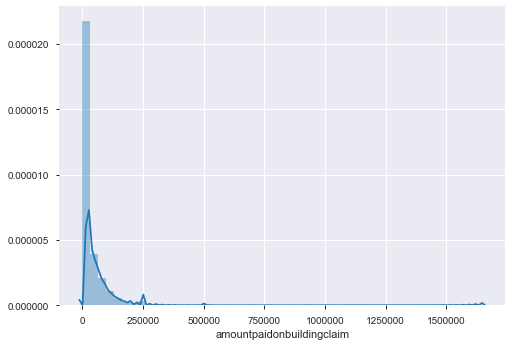

In [33]:
#the target is very right skewed
import seaborn as sns 
sns.distplot(sclaims['amountpaidonbuildingclaim'])

In [68]:
buildingclaim_log = np.log1p(sclaims['amountpaidonbuildingclaim'])

In [69]:
#there was one null value that got missed in the code above somehow
buildingclaim_log= buildingclaim_log.dropna(how='any', axis=0)

In [70]:
buildingclaim_log.isnull().value_counts()

False    36557
Name: amountpaidonbuildingclaim, dtype: int64

In [71]:
(buildingclaim_log == 0).value_counts()

False    36557
Name: amountpaidonbuildingclaim, dtype: int64

In [73]:
sclaims['amountpaidonbuildingclaim'] = buildingclaim_log

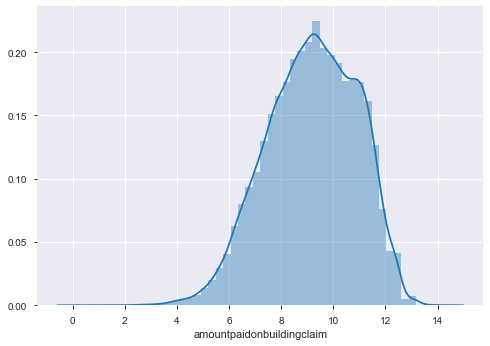

In [80]:
sns.distplot(sclaims['amountpaidonbuildingclaim'])

In [ ]:
#sns.distplot(np.expm1(buildingclaim_log))
#sclaims['amountpaidonbuildingclaim'] = np.expm1(buildingclaim_log)

#leaving this here for later,
#how to reverse the log transform to interpret the results

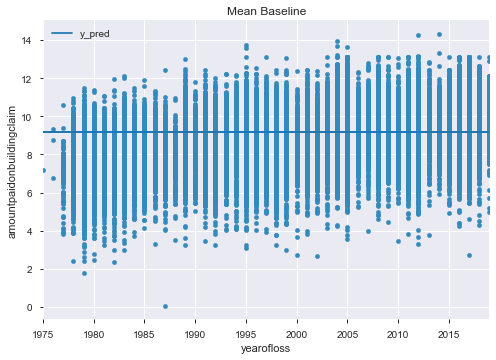

In [81]:
#Initial baseline

plot = sclaims.plot.scatter('yearofloss', 'amountpaidonbuildingclaim')

mean = sclaims['amountpaidonbuildingclaim'].mean()
sclaims['y_pred'] = mean
title = 'Mean Baseline'

sclaims.plot('yearofloss', 'y_pred', ax=plot, title=title)

In [82]:
#un log to understand the mena
np.expm1(mean)

9730.99635586993

In [156]:
errors = np.expm1(mean) - sclaims['amountpaidonbuildingclaim']
mean_absolute_error = errors.abs().mean()
mean_absolute_error

9722.0825021331

In [83]:
#since it is easy and I suspect the relationship is non-monotonic but leaning towards
#a linear relationship with a lot of outliers, I will start with ridge regression

from sklearn.model_selection import train_test_split

train, test = train_test_split(
    sclaims, random_state=42)

train.shape, test.shape


train, val = train_test_split(train, random_state=42, test_size=.35)
train.shape, val.shape

target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((17821, 24), (9596, 24), (9140,))

In [89]:
#baseline

from sklearn.metrics import mean_absolute_error, r2_score
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True )
    )

pipeline.fit(X_train, y_train)
print('Train Score:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Score: 0.37596694089220745
Val score: 0.36725023836654047


In [90]:
coefficients = (pipeline.named_steps['ridgecv'].coef_)
sig = pd.Series(coefficients, features)
sig

basefloodelevation                           -0.070434
basementenclosurecrawlspacetype              -0.105122
condominiumindicator                          0.010513
policycount                                  -0.038636
countycode                                   -0.088877
crsdiscount                                   0.048207
elevatedbuildingindicator                    -0.076351
elevationdifference                           0.009578
censustract                                   0.100629
floodzone                                     0.021529
latitude                                     -0.055040
locationofcontents                           -0.022576
longitude                                    -0.058603
numberoffloorsintheinsuredbuilding           -0.026387
obstructiontype                               0.028145
occupancytype                                 0.083707
originalconstructiondate                      0.001555
amountpaidoncontentsclaim                     0.638501
amountpaid

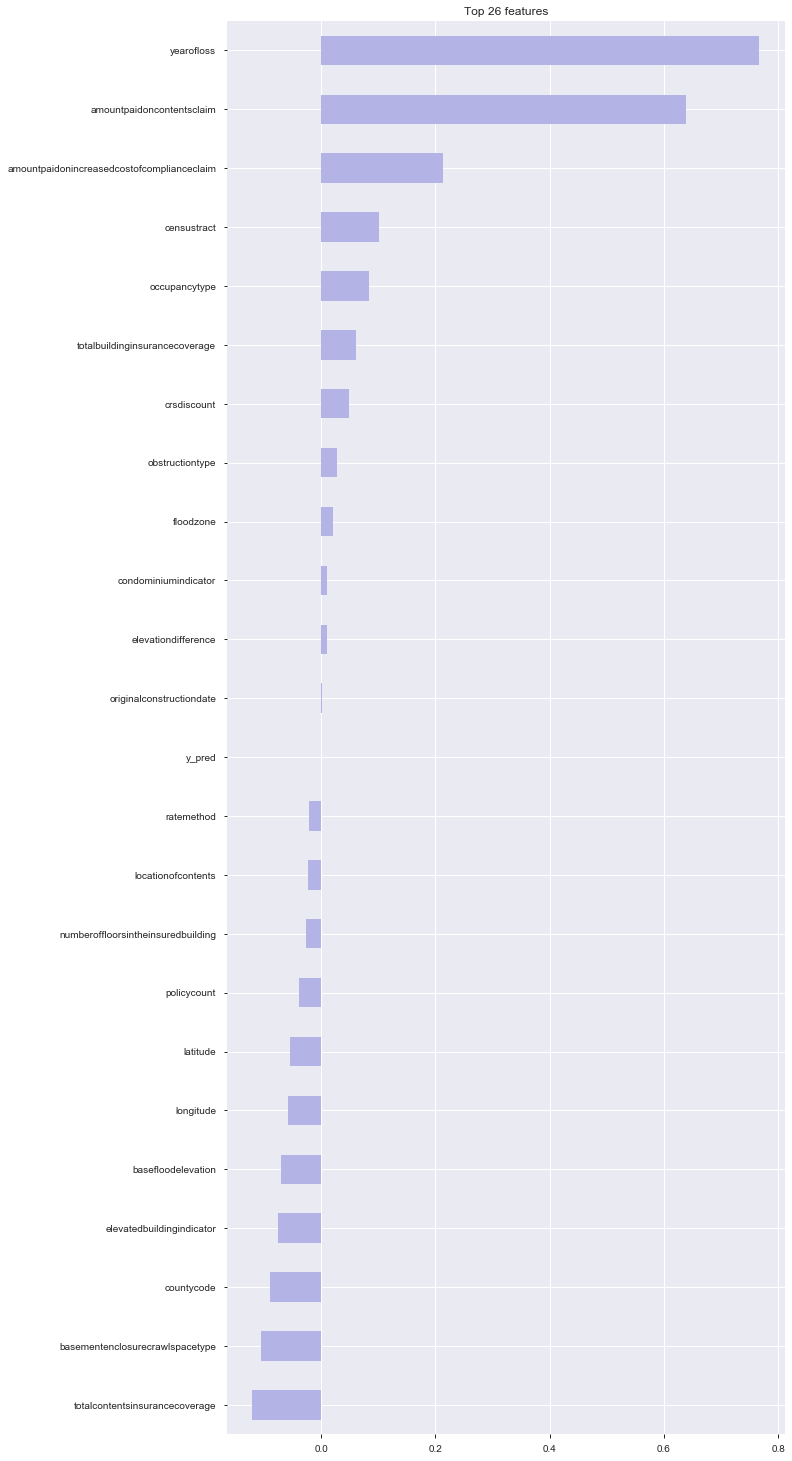

In [91]:
pipe = pipeline.named_steps['ridgecv'].coef_
importances = pd.Series(pipe, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,26))
plt.title(f'Top 26 features')
importances.sort_values()[-26:].plot.barh(color='#b3b3e6')

#yearofloss in this model has the most influence, possibly supporting
#my hypothesis.
#I wonder if total building insurance coverage is causing leakage.

In [86]:
#better baseline

from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Score:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Score: 0.9391297011187298
Val score: 0.574781081965944


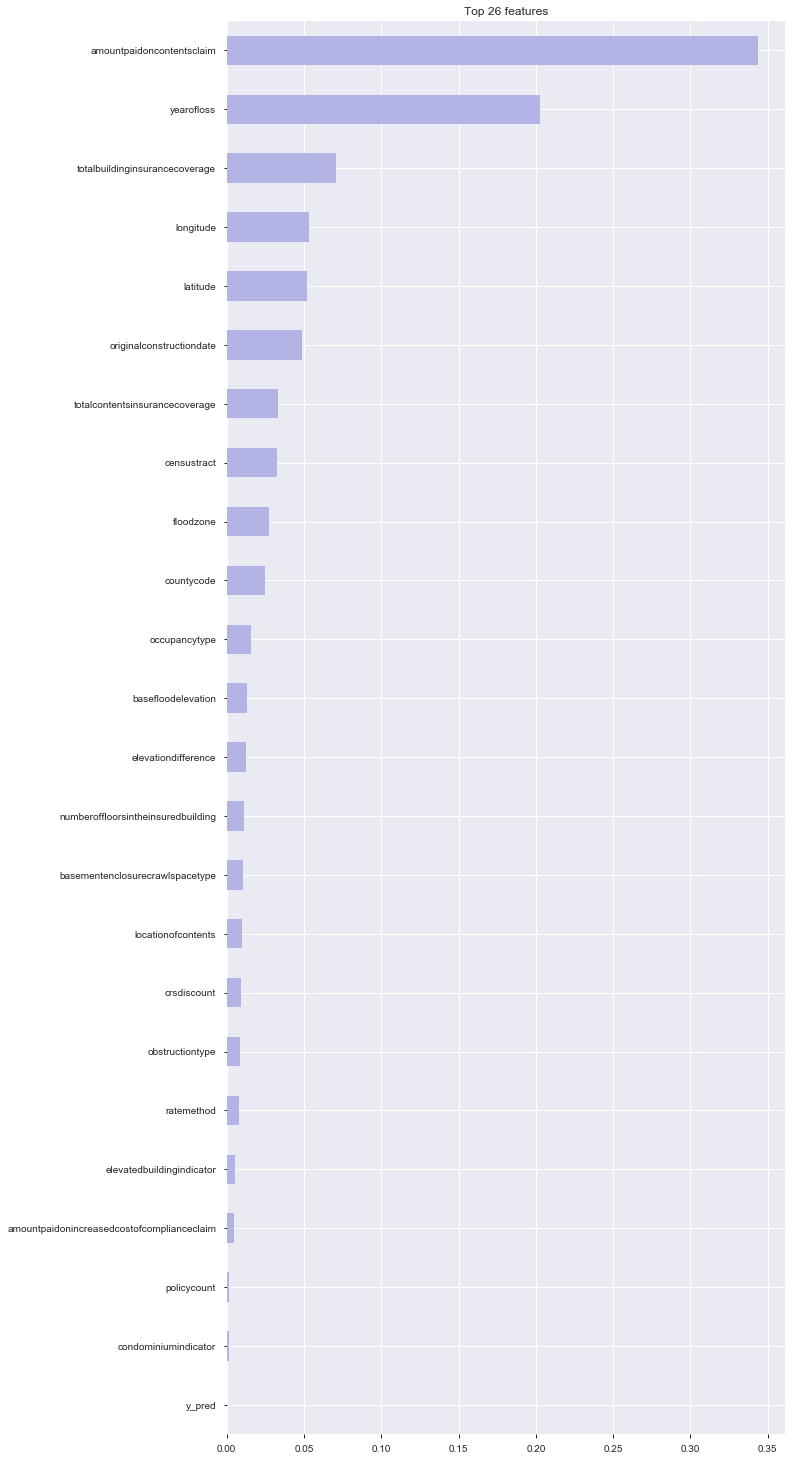

In [88]:
pipe = pipeline.named_steps['randomforestregressor']
importances = pd.Series(pipe.feature_importances_, X_train.columns)

plt.figure(figsize=(10,26))
plt.title(f'Top 26 features')
importances.sort_values()[-26:].plot.barh(color='#b3b3e6')

In [ ]:
#new day
#I think that the amountpaidoncontents is causing leakage, because if there is a lot
#paid on the building then there super likely damage to people's belongings too 

#possibly the insurance coverage as well, because of course if you take out more insurance
#then you can get a higher amount claimed

In [92]:
#rerunning model without the amountpaidcontents (probably leakage)

target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((17821, 23), (9596, 23), (9140,))

In [93]:
#rerunning first graph without leakage
#lost 8%

alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True )
    )

pipeline.fit(X_train, y_train)
print('Train Score:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.2910793893841538
Val score: 0.2883409471080929


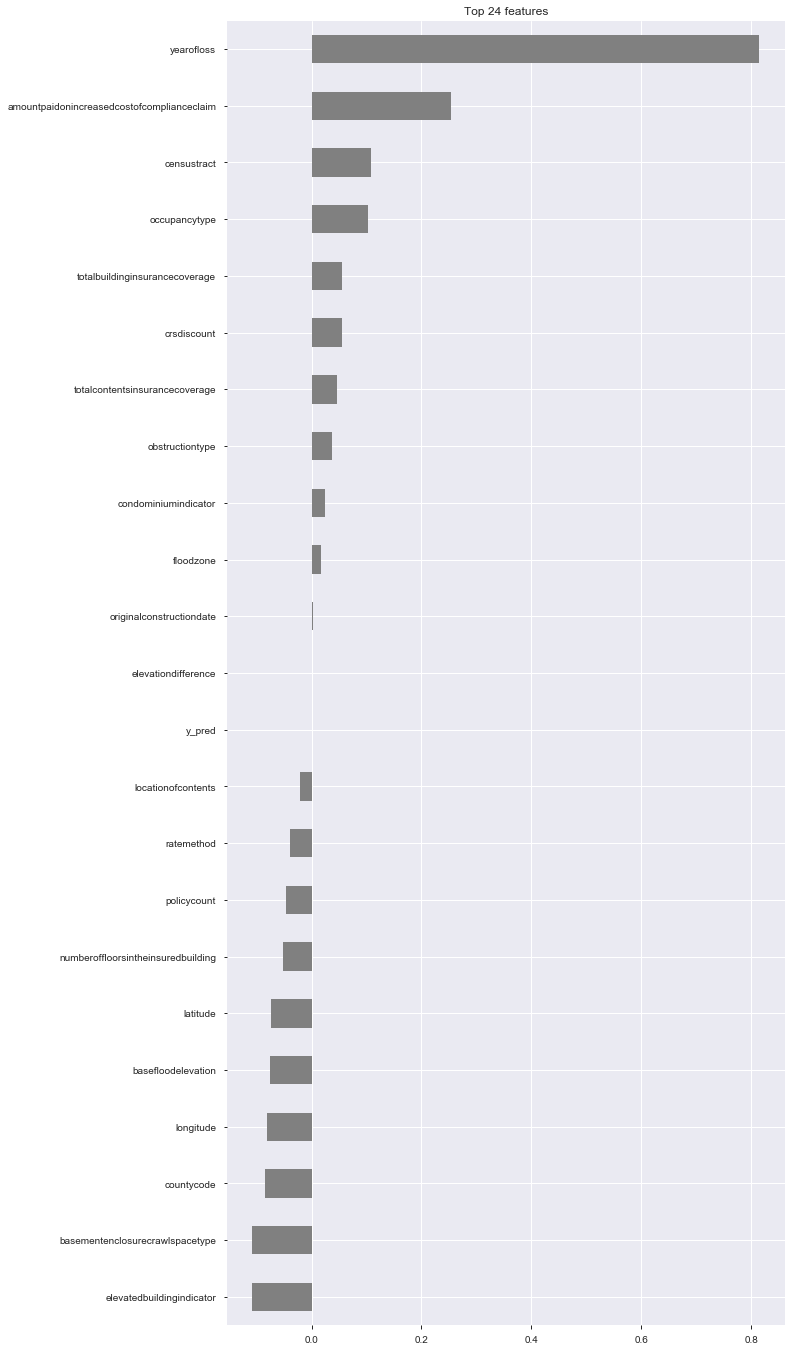

In [94]:
pipe = pipeline.named_steps['ridgecv'].coef_
importances = pd.Series(pipe, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,24))
plt.title(f'Top 24 features')
importances.sort_values()[-24:].plot.barh(color='grey')

In [95]:
#score decreased 25%

from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42,
                         max_depth=10)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.5830300189295814
Val score: 0.4558906212824134


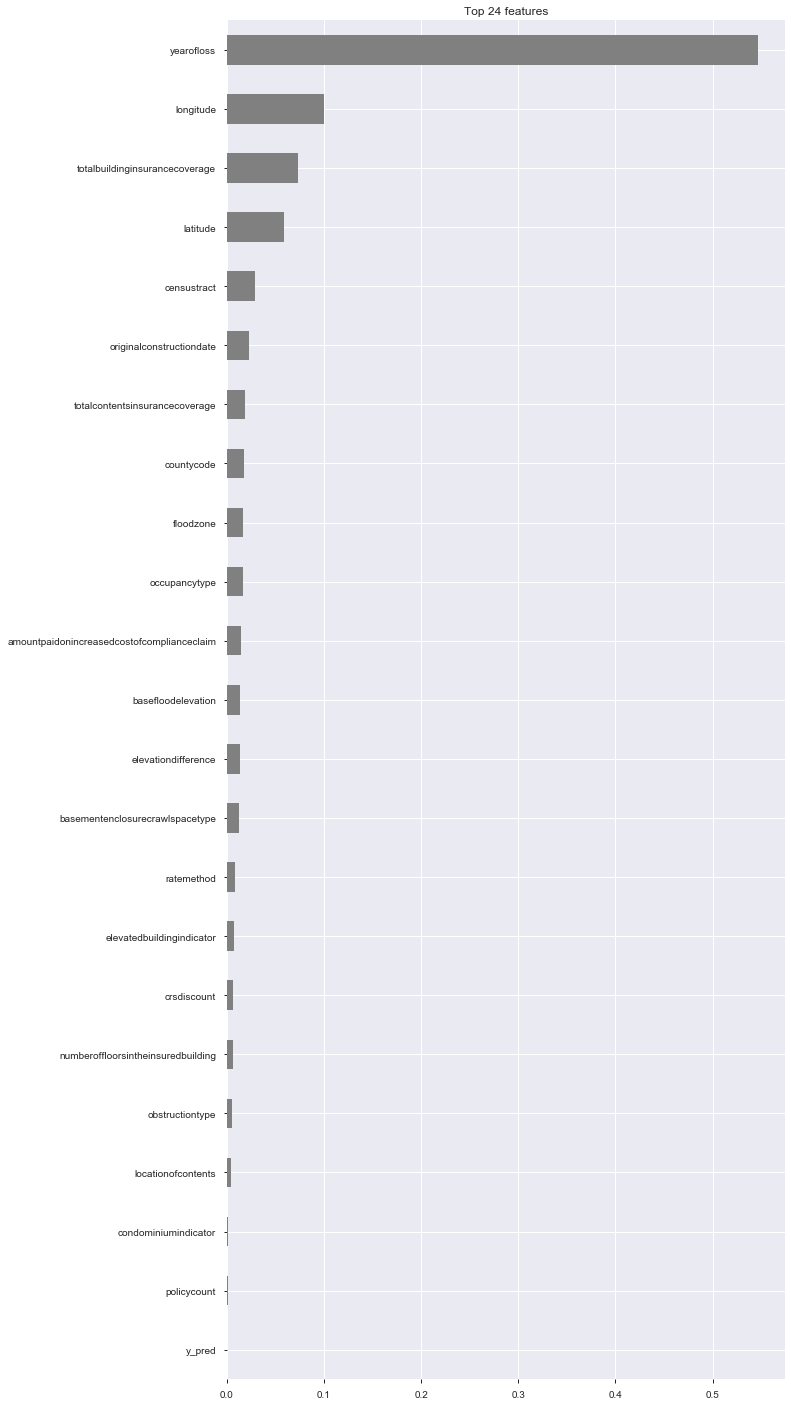

In [96]:
pipe = pipeline.named_steps['randomforestregressor']
importances = pd.Series(pipe.feature_importances_, X_train.columns)

plt.figure(figsize=(10,25))
plt.title(f'Top 24 features')
importances.sort_values()[-25:].plot.barh(color='grey')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2d16a164bc8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2d16c52e388>})

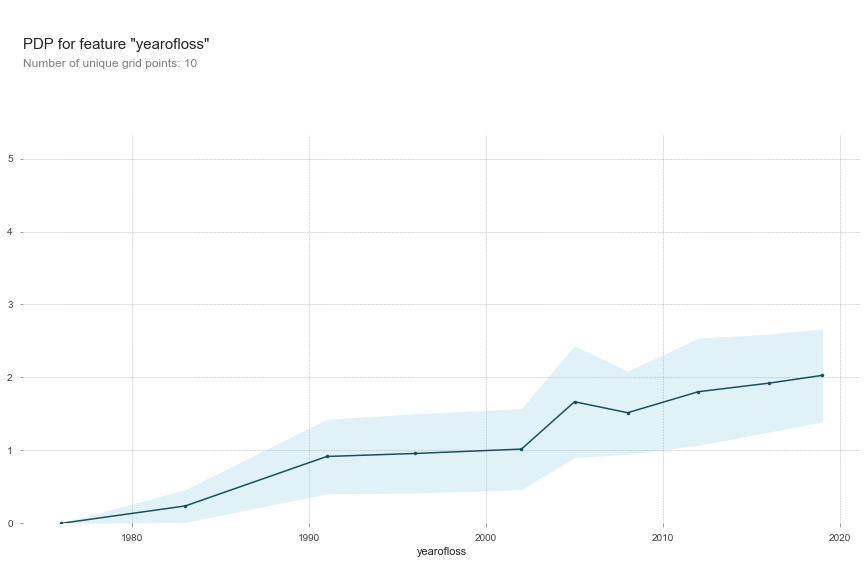

In [97]:
#I want to get a better look using partial dependence at our
#top importances 
from pdpbox.pdp import pdp_isolate, pdp_plot
plt.rcParams['figure.dpi'] = 72

feature= 'yearofloss'

isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature = feature
)

pdp_plot(isolated, feature_name=feature)

In [ ]:
#these notes are all from before I did the time based split :(

#I am quite excited to see that my hypothesis seems to be proving correct!
#the importance of the year is steadily rising
#which means that the year is becoming increasingly more influencial as to whether or not
#it will flood. 

In [72]:
#can I engineer any new features to improve my score? before doing hyperparameter tuning

X_train.columns

Index(['basefloodelevation', 'basementenclosurecrawlspacetype',
       'condominiumindicator', 'policycount', 'countycode', 'crsdiscount',
       'elevatedbuildingindicator', 'elevationdifference', 'censustract',
       'floodzone', 'latitude', 'locationofcontents', 'longitude',
       'numberoffloorsintheinsuredbuilding', 'obstructiontype',
       'occupancytype', 'originalconstructiondate',
       'amountpaidonincreasedcostofcomplianceclaim', 'ratemethod',
       'totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage',
       'yearofloss', 'y_pred'],
      dtype='object')

In [ ]:
#ideas for feature engineering

#basefloodelevation 
#elevation at which there is a 1% chance per year of flooding in feet from the elevation

#floodzone
#different catagories of flooding risk

#elevatedbuildingindicator
#as it sounds

#elevation difference
#Difference in feet between the elevation of the lowest floor used for rating or the 
#floodproofed elevation and the base flood elevation

#amountpaidonincreasedcostofcomplianceclaim
#$ given after severe flooding to relocate, rebuild, or raise house

#maybe state and floodzone could be combined?
#or basefloodelevation and floodzone

In [98]:
#(difference in lowest floor from elevation with 1% chance of flooding) + 
#(elevation with 1% chance of flooding) 
#this will give a single number as the number of feet=1% chance of flooding

sclaims['heightawayfrom_flooding'] = sclaims['elevationdifference'] + sclaims['basefloodelevation']

In [99]:
#redoing my split with the new feature
train, test = train_test_split(
    sclaims, random_state=42)

train.shape, test.shape


train, val = train_test_split(train, random_state=42, test_size=.35)
train.shape, val.shape

target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((17821, 24), (9596, 24), (9140,))

In [100]:
#my score didn't change

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42,
                         max_depth=10)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.583244518145539
Val score: 0.45549002540075034


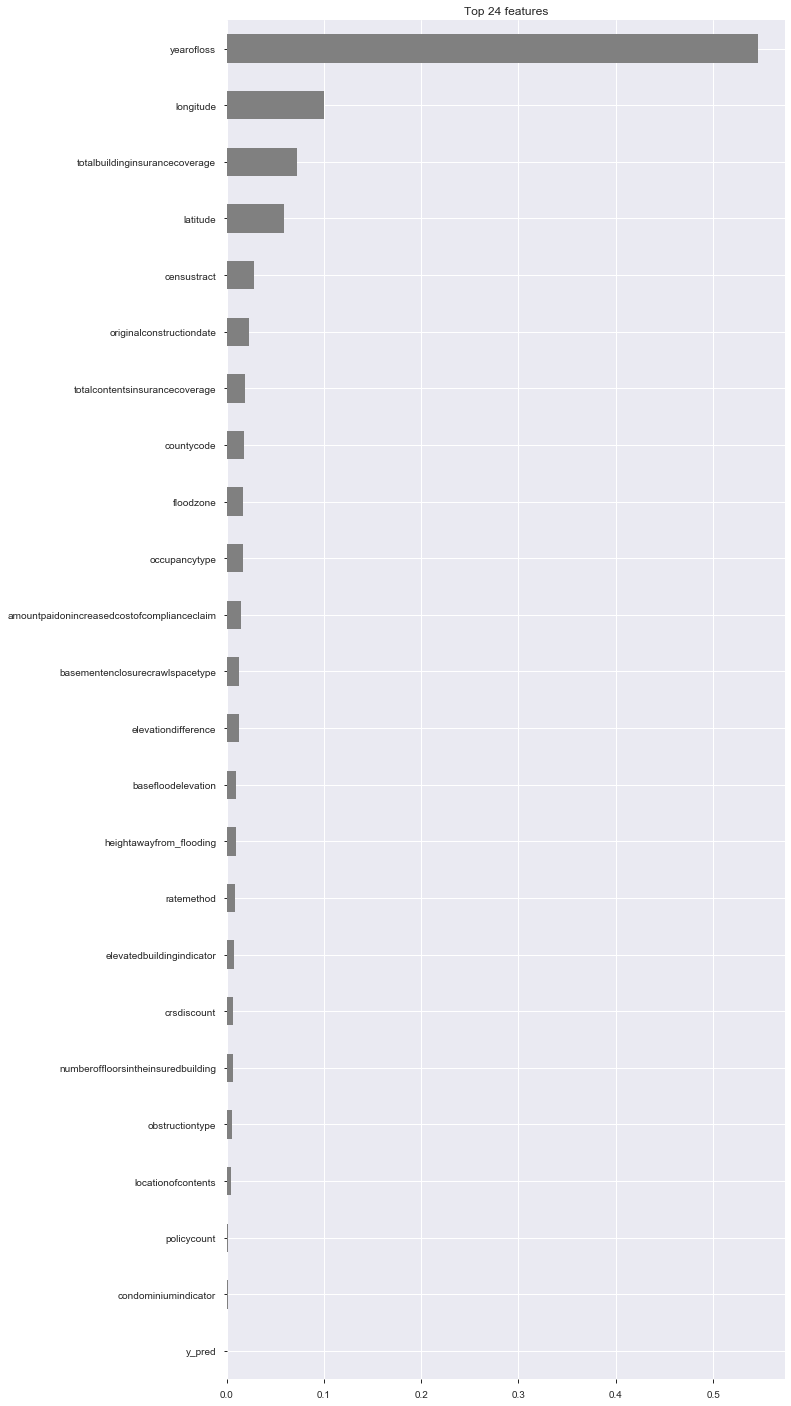

In [101]:
#lets see what little influence this new feature had
#17th on the list

pipe = pipeline.named_steps['randomforestregressor']
importances = pd.Series(pipe.feature_importances_, X_train.columns)

plt.figure(figsize=(10,25))
plt.title(f'Top 24 features')
importances.sort_values()[-25:].plot.barh(color='grey')

In [102]:
#I think that totalbuildinginsurancecoverage is causing leakage
#I need to remove that too

target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim',
        'totalbuildinginsurancecoverage']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((17821, 23), (9596, 23), (9140,))

In [103]:
#slight increase
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True )
    )

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.2910187922336054
Val score: 0.28841645004087924


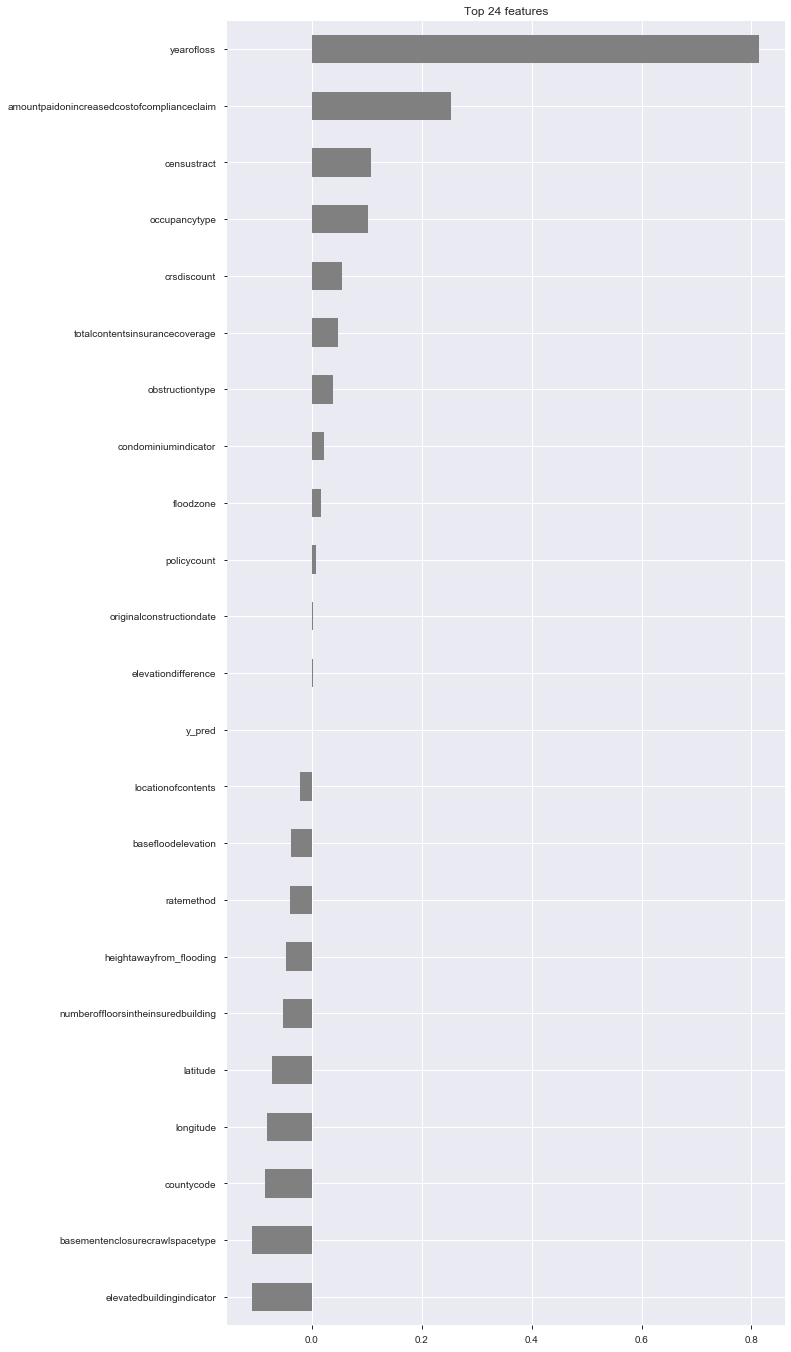

In [104]:
pipe = pipeline.named_steps['ridgecv'].coef_
importances = pd.Series(pipe, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,24))
plt.title(f'Top 24 features')
importances.sort_values()[-24:].plot.barh(color='grey')

In [105]:
#it got worse

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42,
                         max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.3302330715513745
Val score: 0.3286236832358751


In [106]:
#this is where I began the time based split
#after looking over the PDP plot again and talking
#to my section lead, I realized a time-based the only way to 
#ensure that the year isn't causing leakage
#also pulling from only one state will make things simpler


sclaims = claims[(claims['state'] == 'FL')].sample(n=50000, random_state=2)

#reasons for droping detailed in initial cleaning
columns = ['asofdate', 'elevationcertificateindicator', 'houseworship', 'lowestadjacentgrade',
          'lowestfloorelevation', 'nonprofitindicator', 'postfirmconstructionindicator',
          'primaryresidence', 'reportedzipcode', 'reportedcity', 'smallbusinessindicatorbuilding',
          'agriculturestructureindicator', 'state']
sclaims.drop(columns, axis=1, inplace=True)

#needs datetime
sclaims['originalnbdate'] = pd.to_datetime(sclaims['originalnbdate'])

#latitude and longitude should not have 0s, these rows should be dropped

sclaims['latitude'] = sclaims['latitude'].replace(0, np.NaN)
(sclaims['latitude'] == 0).value_counts()

sclaims['longitude'] = sclaims['longitude'].replace(0, np.NaN)
(sclaims['longitude'] == 0).value_counts()

#dropping all rows with the target missing
sclaims['amountpaidonbuildingclaim'].replace(['NaN', 'NaT', 0], np.nan, inplace=True)
sclaims = sclaims.dropna(subset=['amountpaidonbuildingclaim'])
(sclaims['amountpaidonbuildingclaim']==0).value_counts()

#log transform
buildingclaim_log = np.log1p(sclaims['amountpaidonbuildingclaim'])
sclaims['amountpaidonbuildingclaim'] = buildingclaim_log

In [107]:
#realized by looking at year of loss how much it was overfitting to the year
#and my split should have been time based

#I divided them and merged them based off the end size of the dataset
#train is the largest, val is about half the size, and test is a little smaller than that
a = (sclaims[sclaims['yearofloss'] < 1984])
b = (sclaims[(sclaims['yearofloss'] >= 1985)& (sclaims['yearofloss'] <= 1990)])
c = (sclaims[(sclaims['yearofloss'] >= 1991)& (sclaims['yearofloss'] <= 1995)])
d = (sclaims[(sclaims['yearofloss'] >= 1996)& (sclaims['yearofloss'] <= 2000)])

train1 = pd.merge(a, b, how='outer')
train2 = pd.merge(c,d, how='outer')
train= pd.concat([train1, train2])
print(train.shape)

#val

e =(sclaims[(sclaims['yearofloss'] >= 2001)& (sclaims['yearofloss'] <= 2005)])
f=(sclaims[(sclaims['yearofloss'] >= 2006)& (sclaims['yearofloss'] <= 2010)])

val = pd.merge(e,f, how='outer')
print(val.shape)

# test 

g = (sclaims[(sclaims['yearofloss'] >= 2011)& (sclaims['yearofloss'] <= 2015)])
h = (sclaims[(sclaims['yearofloss'] >= 2016)& (sclaims['yearofloss'] <= 2020)])

test = pd.merge(g, h, how='outer')
print(test.shape)

(14596, 26)
(8725, 26)
(6290, 26)


In [108]:
target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim',
        'totalbuildinginsurancecoverage']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((14596, 21), (8725, 21), (6290,))

In [116]:
#this score decreased significnatly
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas)
    )

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.16046255786753916
Val score: 0.11901731031159112


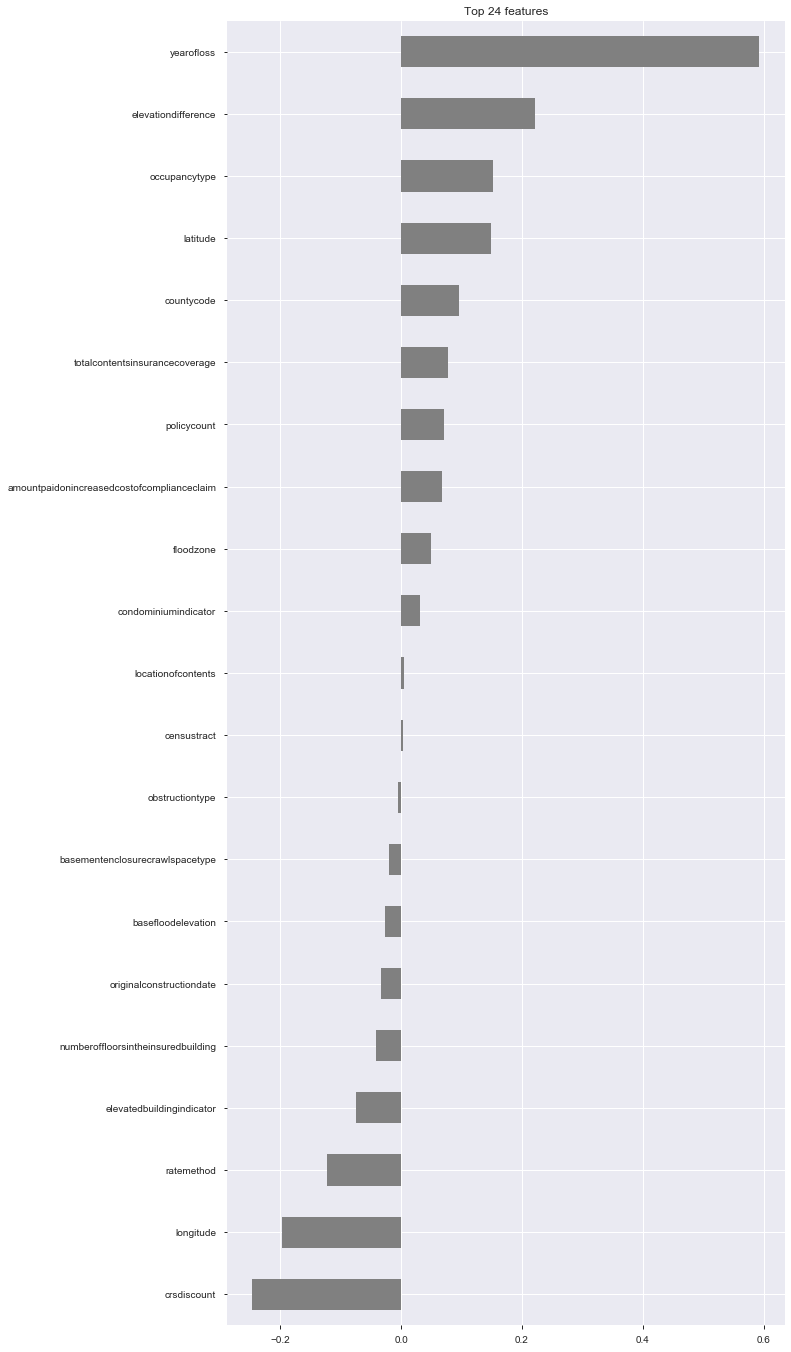

In [129]:
pipe = pipeline.named_steps['ridgecv'].coef_
importances = pd.Series(pipe, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,24))
plt.title(f'Top 24 features')
importances.sort_values()[-24:].plot.barh(color='grey')

In [130]:
#way worse, in the negatives
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42,
                         max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.1804842479506774
Val score: -0.19761941879706213


In [114]:
#I initially made this shaply plot to get a visual for my blog post
#but the results are really hard to interpret due to the encoding
#and I don't have time to find a better way

ran_forest = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42, max_depth=3)
encoder = ce.OrdinalEncoder()
scaler = StandardScaler()
imputer = SimpleImputer()

encoded_train = encoder.fit_transform(X_train)
encoded_val = encoder.transform(X_val)
scaled_train = scaler.fit_transform(encoded_train)
scaled_val = scaler.transform(encoded_val)
imputed_train = imputer.fit_transform(scaled_train)
imputed_val = imputer.transform(scaled_val)

ran_forest.fit(imputed_train, y_train)
ran_forest.predict(imputed_val)

array([7.98546426, 7.98546426, 8.52188832, ..., 8.83236935, 8.29146939,
       7.93486834])

In [115]:
row = imputed_val[0]

import shap

explainer = shap.TreeExplainer(ran_forest)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [88]:
#since ridge cv is my best model I wanted to run cross validation on it,
#even though it has limited results due to already using cross validation
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV()
)

alphas = [0.01, 0.1, 1.0, 10, 100]
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'ridgecv__alphas':[alphas],
    'ridgecv__fit_intercept': [True, False],
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions= param_distributions,
    n_iter=20,
    cv = 5,
    scoring='neg_mean_absolute_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)


search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    4.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('standardscaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             wi

In [89]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

#these are all the parameters I was already using

Best hyperparameters {'simpleimputer__strategy': 'mean', 'ridgecv__fit_intercept': True, 'ridgecv__alphas': [0.01, 0.1, 1.0, 10, 100]}
Cross-validation MAE 1.1412641849710066


In [134]:
#will try cross validation with random forest
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, random_state=42)
)


param_distributions = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'randomforestregressor__min_samples_leaf':randint(1,10),
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_depth': [5, 10, 15, 20, None],
    'randomforestregressor__max_features': uniform(0, 1)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions= param_distributions,
    n_iter=20,
    cv = 3,
    scoring='neg_mean_absolute_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)


search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('standardscaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             wi

In [136]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 0.3700725104166436, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 433, 'simpleimputer__strategy': 'mean'}
Cross-validation MAE 1.0778325183621222


In [139]:
#first CV best params
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='most_frequent'),
    RandomForestRegressor(n_jobs=-1, n_estimators=298, random_state=42,
                         max_depth= None, min_samples_leaf=2, max_features=.56)
)


pipeline.fit(X_train, y_train)
print('Train Score:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Score: 0.7981444515644693
Val score: -0.5184547888123665


In [138]:
#second CV best params

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(n_jobs=-1, n_estimators=433, random_state=42,
                         max_depth=None, max_features=.37, min_samples_leaf=3)
)


pipeline.fit(X_train, y_train)
print('Train Score:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Score: 0.6854872944410683
Val score: -0.4996186694892324


In [131]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(n_jobs=-1, n_estimators=50, random_state=42,
                         max_depth=None, max_features=.37, min_samples_leaf=3)
)


pipeline.fit(X_train, y_train)
print('Train Score:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Score: 0.6803984975806022
Val score: -0.5203656147454774


In [92]:
#if any tree based model can work with this, its XGBoost
#but uh, it didn't do any better

from xgboost import XGBRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='mean'),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Train Score:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

[17:12:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Score: 0.2236835306600754
Val score: -0.5167551383982212


In [97]:
#tried to see if this could help me find better parameters
#but it just gave me parameters that overfit

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    XGBRegressor(random_state=42, n_jobs=-1)
)


param_distributions = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'xgbregressor__reg_lamba':randint(1,10),
    'xgbregressor__reg_alpha':randint(1,10),
    'xgbregressor__n_estimators': randint(50, 500),
    'xgbregressor__gamma': randint(1,100),
    'xgbregressor__max_depth': [1,2,5,10,15,20]
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions= param_distributions,
    n_iter=20,
    cv = 3,
    scoring='neg_mean_absolute_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train)
print('Train Score:', search.score(X_train, y_train))
print('Val score:', search.score(X_val, y_val))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.9min finished


[17:27:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Score: -0.8675709214860087
Val score: -1.8096577175757071


In [98]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'median', 'xgbregressor__gamma': 7, 'xgbregressor__max_depth': 20, 'xgbregressor__n': 0.29225383801982685, 'xgbregressor__n_estimators': 414, 'xgbregressor__reg_alpha': 5, 'xgbregressor__reg_lamba': 8}
Cross-validation MAE 1.1373732714305869


In [99]:
from xgboost import XGBRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='median'),
    XGBRegressor(gamma=7, max_depth=20, n_estimators=414, random_state=42, n_jobs=-1, reg_alpha=5, reg_lambda=8)
)

pipeline.fit(X_train, y_train)
print('Train Score:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

[17:29:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Score: 0.4415056978048719
Val score: -0.8460707396779097


In [ ]:
#so..........
#everything sucks
#it may just be that the data can't procure this 

In [141]:
#well, this model is pointless

from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='mean'),
    DecisionTreeRegressor(max_depth=1, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.09389351584856942
Val score: -0.24554073431758883


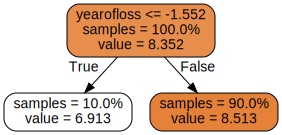

In [144]:
import graphviz 
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeregressor']
encoder = pipeline.named_steps['ordinalencoder']
scaler = pipeline.named_steps['standardscaler']
imputer = pipeline.named_steps['simpleimputer']

encoded = encoder.transform(X_val)
scaled = scaler.transform(encoded)
imputed = imputer.transform(scaled)

columns = X_val.columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, #this stops the tree viz from going on and on
                           feature_names=columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

In [ ]:
#check for inflation

#this isn't a perfect measure but, I wanted to see if the 
#linear model is just getting its results due to inflation
#since naturally, there has been some since 1979.

#this is the website I used 
#https://www.in2013dollars.com/us/inflation/1978?endYear=2019&amount=1051

#putting in the figures below you can see that that amount in 1979
#would be about $4000 dollars today, which is quite different from the $26,128
#average payout

#I cross referenced that with this website and got a very similar answer
#https://smartasset.com/investing/inflation-calculator#K6i7zN8381

In [145]:
from_1979 = sclaims[(sclaims['yearofloss'] == 1979)]
from_1979mean = from_1979['amountpaidonbuildingclaim'].mean()
(np.expm1(from_1979mean))

1025.210444233209

In [146]:
from_2018 = sclaims[(sclaims['yearofloss'] == 2018)]
from_2018mean = from_2018['amountpaidonbuildingclaim'].mean()
(np.expm1(from_2018mean))

26128.425912379502